### Importing Libraries

In [ ]:
from google.colab import drive
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
import PIL
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, ReLU

### Preparing Train and Eval Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip -qq /content/drive/MyDrive/Paneeta/archive_5.zip

In [ ]:
path_to_train_data = '/content/Train/'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    directory=path_to_train_data,
    target_size=(50, 50),
    batch_size=32,
    class_mode = 'categorical',
    subset='training',
)

eval_data = datagen.flow_from_directory(
    directory=path_to_train_data,
    target_size=(50, 50),
    batch_size=32,
    class_mode = 'categorical',
    subset='validation',
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


### Plotting the data

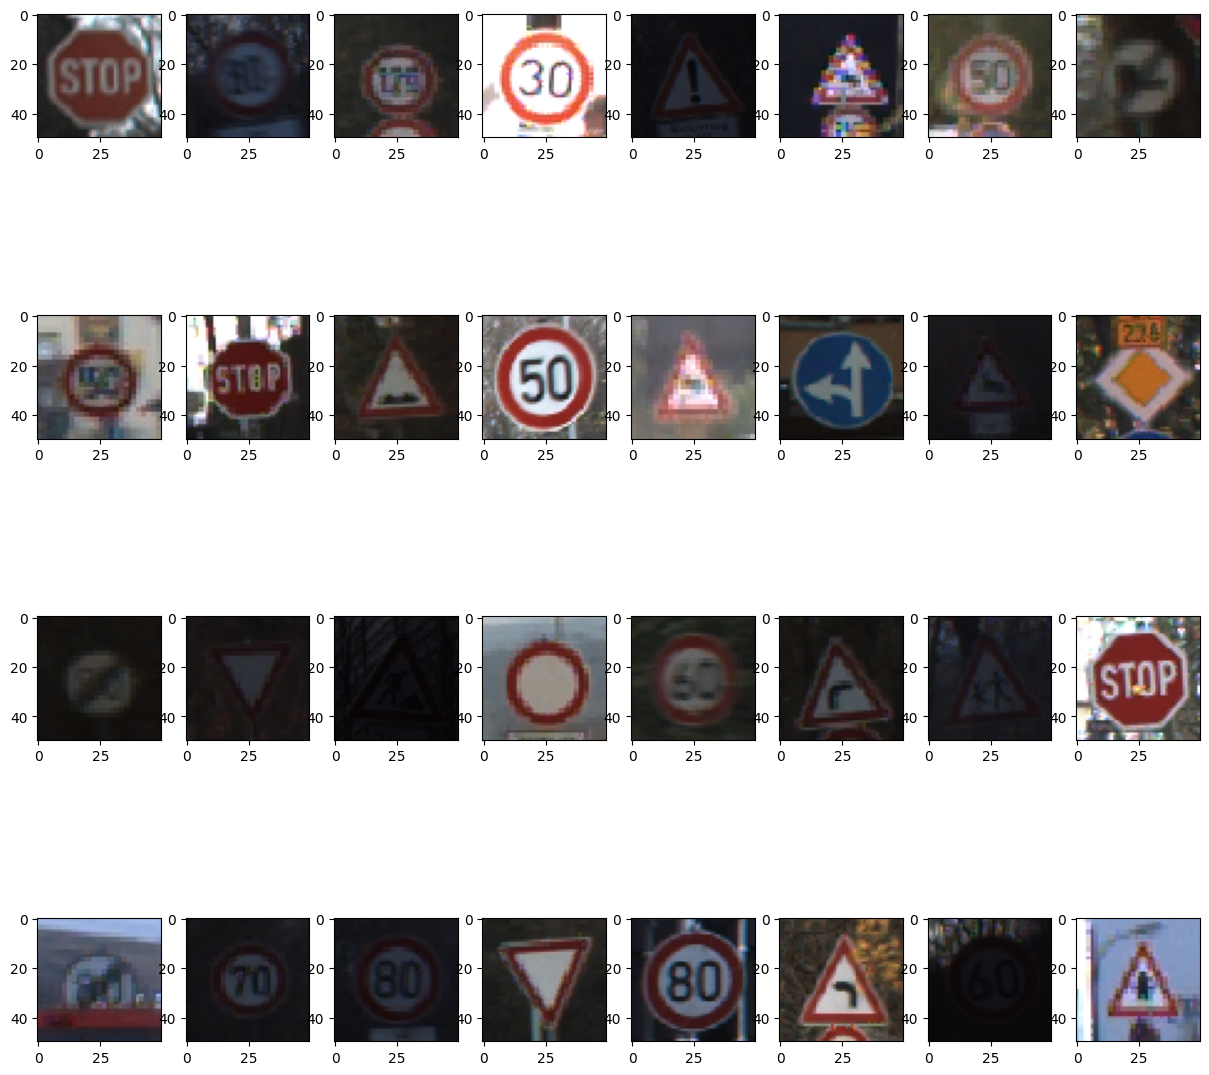

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=8, figsize=(15,15))
axis = axis.flatten()

for i in range(len(train_data.next()[0])):
  axis[i].imshow(train_data.next()[0][i])
plt.show()

### Model Implementation

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(50,50,3)))
model.add(ReLU())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3)))
model.add(ReLU())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3)))
model.add(ReLU())
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(ReLU())
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 re_lu (ReLU)                (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 21, 21, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

### Training

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=10, validation_data=eval_data)

Epoch 1/10
981/981 [==============================] - 34s 24ms/step - loss: 0.8105 - accuracy: 0.7819 - val_loss: 0.4066 - val_accuracy: 0.9043
Epoch 2/10
981/981 [==============================] - 22s 22ms/step - loss: 0.0743 - accuracy: 0.9810 - val_loss: 0.3430 - val_accuracy: 0.9181
Epoch 3/10
981/981 [==============================] - 22s 23ms/step - loss: 0.0395 - accuracy: 0.9894 - val_loss: 0.3466 - val_accuracy: 0.9330
Epoch 4/10
981/981 [==============================] - 24s 25ms/step - loss: 0.0269 - accuracy: 0.9926 - val_loss: 0.2696 - val_accuracy: 0.9438
Epoch 5/10
981/981 [==============================] - 23s 24ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.4802 - val_accuracy: 0.9161
Epoch 6/10
981/981 [==============================] - 21s 21ms/step - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.2341 - val_accuracy: 0.9534
Epoch 7/10
981/981 [==============================] - 21s 21ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.4496 - val_accuracy:

In [ ]:
pd.read_csv('/content/Test.csv')

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [ ]:
meta = pd.read_csv('/content/Meta.csv')
meta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


### Evaluation

In [ ]:
test_data_path = '/content/Test/'
test_labels_csv = pd.read_csv('/content/Test.csv')
test_labels_csv['ClassId'] = test_labels_csv['ClassId'].astype(str)
test_labels_csv['Path'] = test_labels_csv['Path'].apply(lambda x: "/content/"+x)
#test_labels_csv['Path'] = test_labels_csv['Path'].apply(lambda x: x.split('/')[1])
#test_labels_csv['Path'] = test_labels_csv['Path'].apply(lambda x: x.split('.')[0])
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = datagen.flow_from_dataframe(
    directory=path_to_train_data,
    dataframe=test_labels_csv,
    x_col='Path',
    y_col='ClassId',
    target_size=(50, 50),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=False
)


Found 12630 validated image filenames belonging to 43 classes.


In [ ]:
classes_dec = {
    '0': 'Speed limit (20km/h)',
    '1': 'Speed limit (30km/h)',
    '2': 'Speed limit (50km/h)',
    '3': 'Speed limit (60km/h)',
    '4': 'Speed limit (70km/h)',
    '5': 'Speed limit (80km/h)',
    '6': 'End of speed limit (80km/h)',
    '7': 'Speed limit (100km/h)',
    '8': 'Speed limit (120km/h)',
    '9': 'No passing',
    '10': 'No passing veh over 3.5 tons',
    '11': 'Right-of-way at intersection',
    '12': 'Priority road',
    '13': 'Yield',
    '14': 'Stop',
    '15': 'No vehicles',
    '16': 'Veh > 3.5 tons prohibited',
    '17': 'No entry',
    '18': 'General caution',
    '19': 'Dangerous curve left',
    '20': 'Dangerous curve right',
    '21': 'Double curve',
    '22': 'Bumpy road',
    '23': 'Slippery road',
    '24': 'Road narrows on the right',
    '25': 'Road work',
    '26': 'Traffic signals',
    '27': 'Pedestrians',
    '28': 'Children crossing',
    '29': 'Bicycles crossing',
    '30': 'Beware of ice/snow',
    '31': 'Wild animals crossing',
    '32': 'End speed + passing limits',
    '33': 'Turn right ahead',
    '34': 'Turn left ahead',
    '35': 'Ahead only',
    '36': 'Go straight or right',
    '37': 'Go straight or left',
    '38': 'Keep right',
    '39': 'Keep left',
    '40': 'Roundabout mandatory',
    '41': 'End of no passing',
    '42': 'End no passing veh > 3.5 tons'
}

In [ ]:
pred_decoder = {test_data.class_indices.get(key, key): value for key, value in classes_dec.items()}
pred_decoder

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 12: 'Speed limit (50km/h)',
 23: 'Speed limit (60km/h)',
 34: 'Speed limit (70km/h)',
 38: 'Speed limit (80km/h)',
 39: 'End of speed limit (80km/h)',
 40: 'Speed limit (100km/h)',
 41: 'Speed limit (120km/h)',
 42: 'No passing',
 2: 'No passing veh over 3.5 tons',
 3: 'Right-of-way at intersection',
 4: 'Priority road',
 5: 'Yield',
 6: 'Stop',
 7: 'No vehicles',
 8: 'Veh > 3.5 tons prohibited',
 9: 'No entry',
 10: 'General caution',
 11: 'Dangerous curve left',
 13: 'Dangerous curve right',
 14: 'Double curve',
 15: 'Bumpy road',
 16: 'Slippery road',
 17: 'Road narrows on the right',
 18: 'Road work',
 19: 'Traffic signals',
 20: 'Pedestrians',
 21: 'Children crossing',
 22: 'Bicycles crossing',
 24: 'Beware of ice/snow',
 25: 'Wild animals crossing',
 26: 'End speed + passing limits',
 27: 'Turn right ahead',
 28: 'Turn left ahead',
 29: 'Ahead only',
 30: 'Go straight or right',
 31: 'Go straight or left',
 32: 'Keep right'

In [ ]:
score = model.evaluate(test_data)

395/395 [==============================] - 9s 23ms/step - loss: 0.2410 - accuracy: 0.9546


In [ ]:
print('Accuracy (in %): ', score[1]*100)
print('Loss (in %):     ', score[0]*100)

Accuracy (in %):  95.45526504516602
Loss (in %):      24.095259606838226


### Recognising the traffic signs

1/1 [==============================] - 0s 29ms/step
Predicted Sign name:  Veh > 3.5 tons prohibited
Actual Label name:    Veh > 3.5 tons prohibited


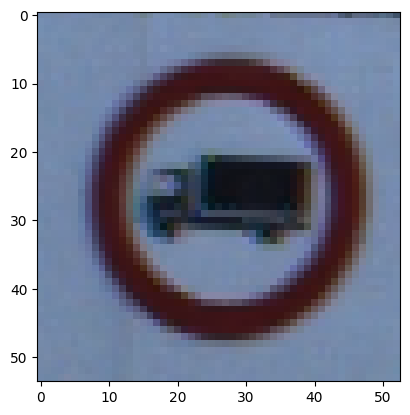

In [ ]:
image_path = '/content/Test/00000.png'
image_sign = PIL.Image.open(image_path)
test_image = image.load_img(image_path, target_size=(50, 50))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
#test_image = test_image / 255.0
#print(test_image.shape)
pred = np.argmax(model.predict(test_image))
plt.imshow(image_sign)
print('Predicted Sign name: ', pred_decoder[pred])
print('Actual Label name:   ', classes_dec[test_labels_csv.loc[test_labels_csv['Path'] == image_path, 'ClassId'].values[0]])

1/1 [==============================] - 0s 20ms/step
Predicted Sign name:  Dangerous curve right
Actual Label name:    Dangerous curve right


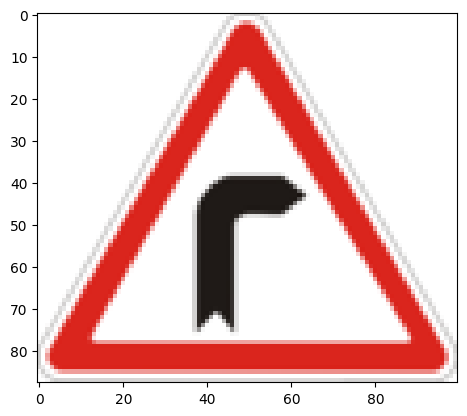

In [ ]:
image_path = '/content/Meta/20.png'
image_sign = PIL.Image.open(image_path)
test_image = image.load_img(image_path, target_size=(50, 50))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
#test_image = test_image / 255.0
#print(test_image.shape)
pred = np.argmax(model.predict(test_image))
plt.imshow(image_sign)
print('Predicted Sign name: ', pred_decoder[pred])
print('Actual Label name:   ', classes_dec[str(meta.loc[meta['Path'] == 'Meta/20.png', 'ClassId'].values[0])])

### Tests on unknown images from different sources

1/1 [==============================] - 0s 98ms/step
Predicted Sign name:  No entry


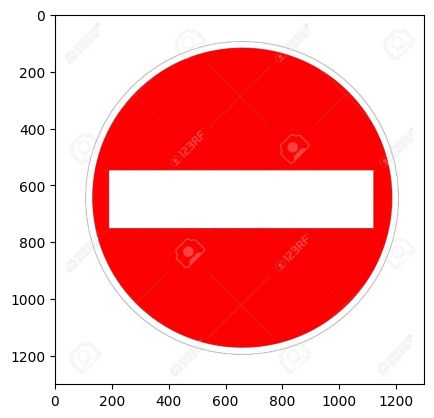

In [ ]:
image_path = '/content/no_entry.png'
image_sign = PIL.Image.open(image_path)
test_image = image.load_img(image_path, target_size=(50, 50))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
#test_image = test_image / 255.0
#print(test_image.shape)
pred = np.argmax(model.predict(test_image))
plt.imshow(image_sign)
print('Predicted Sign name: ', pred_decoder[pred])
#print('Actual Label name:   ', classes_dec[str(meta.loc[meta['Path'] == 'Meta/20.png', 'ClassId'].values[0])])

1/1 [==============================] - 0s 36ms/step
Predicted Sign name:  Bumpy road


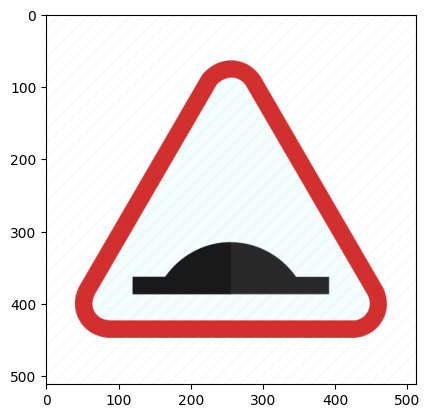

In [ ]:
image_path = '/content/bump.png'
image_sign = PIL.Image.open(image_path)
test_image = image.load_img(image_path, target_size=(50, 50))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
#test_image = test_image / 255.0
#print(test_image.shape)
pred = np.argmax(model.predict(test_image))
plt.imshow(image_sign)
print('Predicted Sign name: ', pred_decoder[pred])
#print('Actual Label name:   ', classes_dec[str(meta.loc[meta['Path'] == 'Meta/20.png', 'ClassId'].values[0])])